# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [2]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

#%matplotlib inline

Прочитаем исходные данные:

In [3]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [4]:
data.shape

(200, 8)

In [5]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<Figure size 432x288 with 0 Axes>

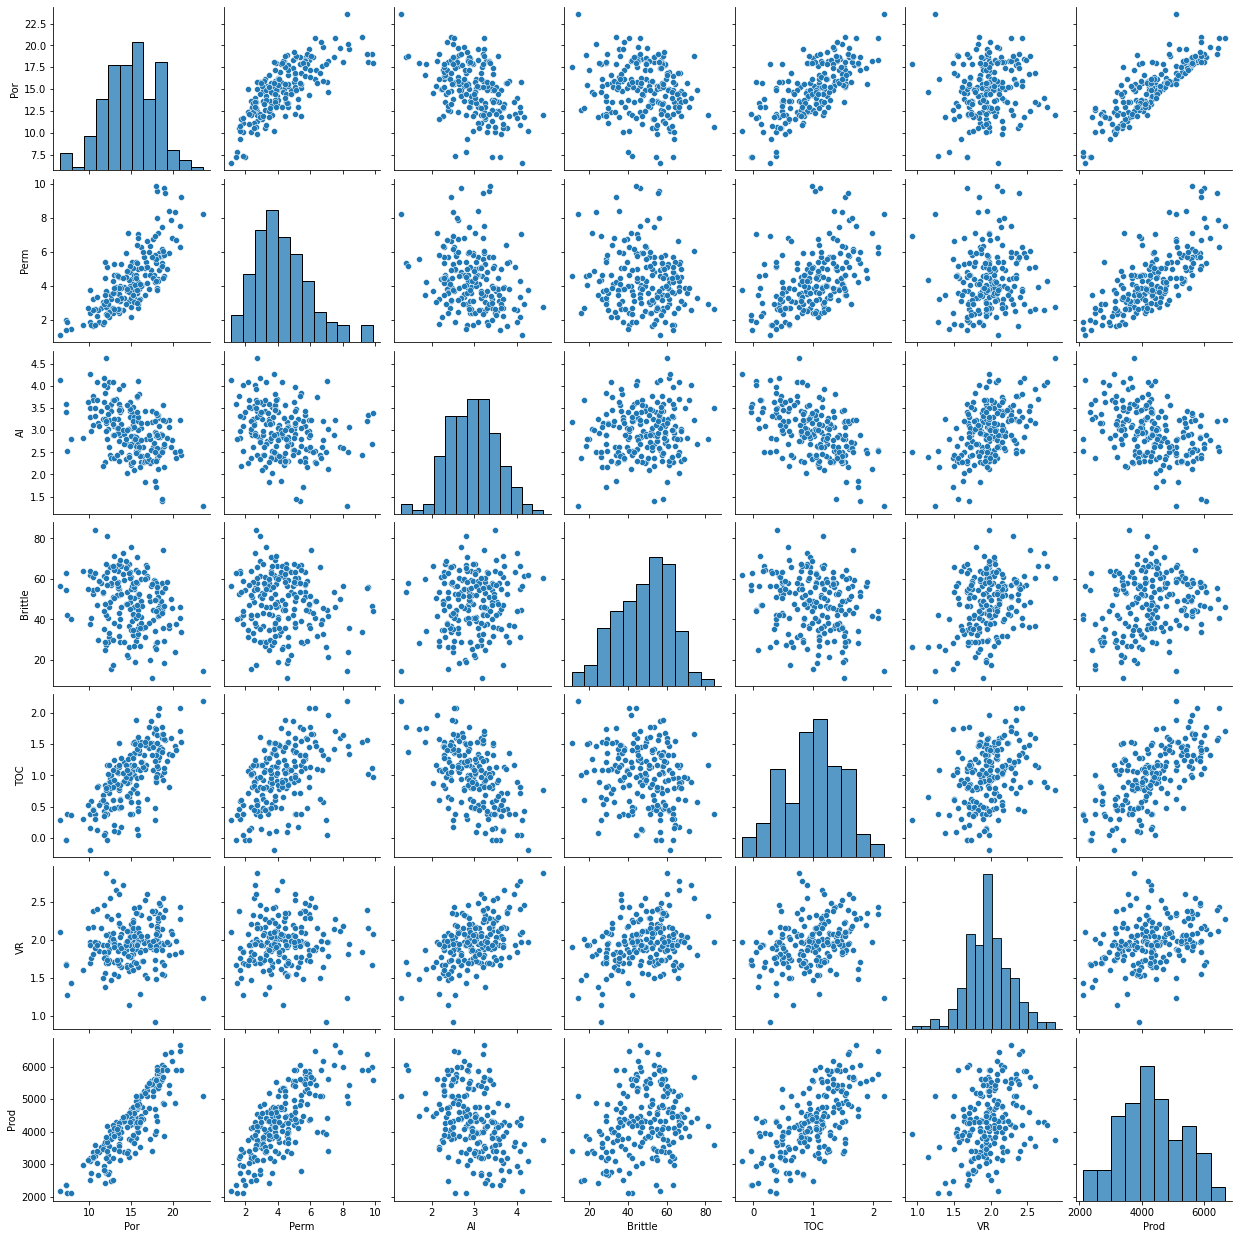

In [6]:
# Ваш код здесь
df = data.drop(['Well'],axis=1)
plt.figure()
sns.pairplot(df)
plt.show();

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

8
0.0007299388072652095


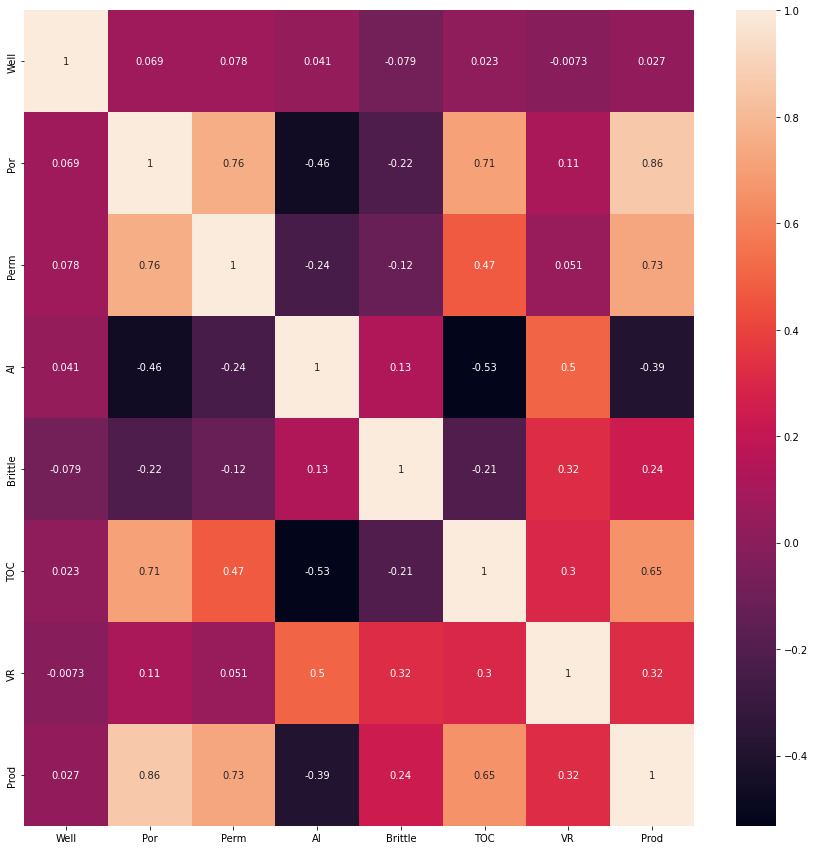

In [7]:
# Ваш код здесь
plt.rcParams['figure.figsize'] = (15,15)
cor = data.corr().values
print(np.linalg.matrix_rank(cor))
print(np.linalg.det(cor))
sns.heatmap(data.corr(), annot=True);

#### Вывод: Параметры Пористочть и Проницаемость скважин имеют довольно сильную корреляцию с целевой переменной 0,86 и 0, 73 соответственно. В целом ранг матрицы корреляции максимальный, а детерминант близок к нулю, что говорит о вырожденности матрицы. На лицо явная мультиколлинеарность, что затруднит использование классической линейной регрессии с использованием МНК поскольку некоторые коэффициенты могут стать неустойчиывыми и сменить знак на противоположный, в чем мы сожем убедиться далее.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [8]:
# Ваш код здесь
X =  data.drop('Prod', axis=1)
X = np.column_stack((np.ones(200), X))
y = data['Prod']
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(w_hat.round(0))

[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


#### Вывод: По полученным коэффициентам линейной регрессии можно сделать вывод, что признак Идентификатор скважины совершенно не информативен и не оказывает влияния на целевую переменную поскольку его коэффициент равен 0. Как уже отмечалось ранее, мультиколлинеарность признаков явилась причиной того, что некоторые коэффициенты не устойчивы. Так коэффициент признака Общий органической углерод отрицательный, хотя коэффциент корреляции этого признака с целевой переменной говорит о положительной связи. Поскольку данный расчет сделан на нестандартизированных данных сложно сделать вывод о признаках, оказывающих наибольшее влияние на целевую переменную. пока же можно отметить, что увеличение коэффиента отражения витринита на единицу, увеличивает медианную производительность скважины на 785 ед.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [9]:
# Строим прогноз выработки газа для скважины с параметрами, указанными ниже и считаем абсолютную ошибку построенного прогноза.

new_data = {
    'w_0': 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
new_prod = 4748.315024

new= np.array([*new_data.values()])
new_pred = (new @ w_hat)
print('prediction:', new_pred)
print('A_ERROR:', round(new_prod - new_pred))

prediction: 4723.06405370718
A_ERROR: 25


In [10]:
# Cтроим прогноз выработки газа для всех скважин из обучающего набора данных и рассчитываем значение метрики MAPE модели

pred = X @ w_hat
error = abs(y - pred )/ y
MAPE = sum(error) * 100 / len(error)
print('MAPE:', round(MAPE, 1))

MAPE: 3.6


#### Вывод: Рассчитанная метрика МАРЕ составило 3,6 % , что говорит о том, что предсказания модели в отклоныяются в среднем от реальных значений на 3,6%

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

#### Вывод: Как уже было отмечено выше фактор ТОС имеет обратный коэффициент регрессии, однако  положительный коэффициент корреляции. Также в этом можно убедиться на основе диаграммы рессеяния выше, отражающей зависимость ТОС от Prod.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь
X =  data.drop(['Well', 'Perm','TOC', 'Prod'], axis=1)
X = np.column_stack((np.ones(200), X))

# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(w_hat.round(0))

[-1835.   293.  -200.    28.   517.]


In [12]:
pred = X @ w_hat
error = abs(y - pred )/ y
MAPE = sum(error) * 100 / len(error)
print('MAPE:', round(MAPE, 3))

MAPE: 4.044


#### Вывод: После удаления высококоррелированых и неинформативных признаков, показание метрики ухудшилось, что говорит о том, что модель стала хуже отображать зависимость данных, поскольку удалились признаки имеющую высокую корреляцию с целевой переменной. При этом удалось устранить противоречие коэффициентов регрессии и корреляции. Также значение коэффициентов регрессии снизились, т.е. уменьшился их разброс, вызванный высокой мультиколлинеарностью.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [13]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn import metrics #метрики

# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(X, y)
y_pred = model.predict(X)
print('w_hat:', model.coef_)
print('MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y, y_pred)*100))


w_hat: [-1835.44646069   293.03624565  -200.03091206    27.64098209
   517.40272597]
MAPE: 4.044


#### Вывод: Значение коэффициентов регрессии и метрики, рассчитанные с помощью библиотечной реализации и результаты классического расчета по МНК совпадают. 

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [14]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [15]:
# Ваш код здесь

X =  data.drop(['Well', 'Perm','TOC', 'Prod'], axis=1)

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
X.shape

(200, 34)

In [16]:
# создаём модель линейной регрессии
lr = LinearRegression()
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


#### Вывод: Применение полиномиальной регрессии на стандартизированных признаках дало существенное улучшение метрики. снижение ошибки - на 1,4 процентных пункта.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [17]:
# Ваш код здесь
# Определяем оптимальные Гиперпараметры с помощью GridSearch
param_grid = [{'alpha': range(1,50)}]
grid_search = GridSearchCV(
    estimator=Lasso(max_iter=1000), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error', 
    return_train_score=True,
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print(f'Best score {-round(grid_search.best_score_*100, 2)}%')

Наилучшие значения гиперпараметров: {'alpha': 5}
Best score 2.28%


In [18]:
# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=5, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.28 %


#### Вывод: Применение Л1 регуляризации с подобранным оптимальным гиперпараметром альфа дало существенное улучшение метрики на 0,4 процентных пункта

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [19]:
# Определяем оптимальные Гиперпараметры с помощью GridSearch
param_grid = [{'alpha': np.linspace(0.01, 25, 200)}]
grid_search = GridSearchCV(
    estimator=Ridge(solver='svd'), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error', 
    return_train_score=True,
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print(f'Best score {-round(grid_search.best_score_*100, 2)}%')

Наилучшие значения гиперпараметров: {'alpha': 0.13557788944723617}
Best score 2.67%


In [20]:
# создаём модель линейной регрессии c L2-регуляризацией с оптимальными значениями ГП
ridge = Ridge(alpha=0.14, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.67 %


#### Вывод: Применение Л2 регуляризации дало совершенное незначительное улучшение метрики. Практически можно сказать, что Л2 регуляризация не оказала влияние.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [21]:
# Определяем оптимальные Гиперпараметры с помощью GridSearch

param_grid = [{'alpha': range(1,50),
               'l1_ratio': np.linspace(0.01, 1, 10)}]
grid_search = GridSearchCV(
    estimator=ElasticNet(max_iter=10000), 
    param_grid=param_grid,
    scoring='neg_mean_absolute_percentage_error', 
    return_train_score=True,
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))
print(f'Best score {-round(grid_search.best_score_*100, 2)}%')

Наилучшие значения гиперпараметров: {'alpha': 5, 'l1_ratio': 1.0}
Best score 2.28%


In [22]:
# создаём модель линейной регрессии c L1- и L2-регуляризациями с оптимальными значениями ГП
el_net = ElasticNet(alpha=5, l1_ratio=1, max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(el_net, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 

MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.28 %


#### Вывод: Подбор оптимальных параметров регуляризации Эластичная сетка показал, что наилучший результат достигается при значении ГП l1_ratio = 1, что по сути приравнивает регуляризацию Эластичная сетка к Л1 регуляризации. О чем собственно и говорит значение метрики, равное метрике при Л1 регуляризации.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [23]:
# Ваш код здесь
data = {'Model': ['MAPE train', 'MAPE test', 'Gyper_Param', 'Polynom'],
        'Linear_Regr': [4.044, None, None, False],
        'Linear_Regr_Polynom': [1.77, 2.68, None, True],
        'Lasso': [1.83, 2.28, 'alpha = 5', True],
        'Ridge': [1.77, 2.67, 'alpha = 0.14', True],
        'ElasticNet': [1.83, 2.28, 'alpha = 5, l1_ratio = 1', True]
        }
result = pd.DataFrame(data)
result

,Model,Linear_Regr,Linear_Regr_Polynom,Lasso,Ridge,ElasticNet
0,MAPE train,4.044,1.77,1.83,1.77,1.83
1,MAPE test,None,2.68,2.28,2.67,2.28
2,Gyper_Param,None,None,alpha = 5,alpha = 0.14,"alpha = 5, l1_ratio = 1"
3,Polynom,False,True,True,True,True


#### Вывод: Наилучший результат показала модель линейной регресии на полиномиальных признаках с Л1 регуляризацией